<a href="https://colab.research.google.com/github/o-bissing/TF_Udemy/blob/main/Autoencoder_for_dimensionality_reduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import make_blobs

In [3]:
data = make_blobs(n_samples=300,
                  n_features=2,
                  centers=2,
                  cluster_std=1.0,
                  random_state=101)

In [4]:
X,y = data

In [5]:
np.random.seed(seed=101)
z_noise = np.random.normal(size=len(X))
z_noise = pd.Series(z_noise)

In [6]:
feat = pd.DataFrame(X)

In [10]:
feat = pd.concat([feat,z_noise],axis=1)

In [11]:
feat.columns = ['X1','X2','X3']

In [12]:
feat.head()

,X1,X2,X3
0,-8.877721,-6.760078,2.706850
1,0.630638,3.107075,0.628133
2,-0.240609,2.820690,0.907969
3,-7.839091,-8.207545,0.503826
4,-10.972908,-7.390676,0.651118


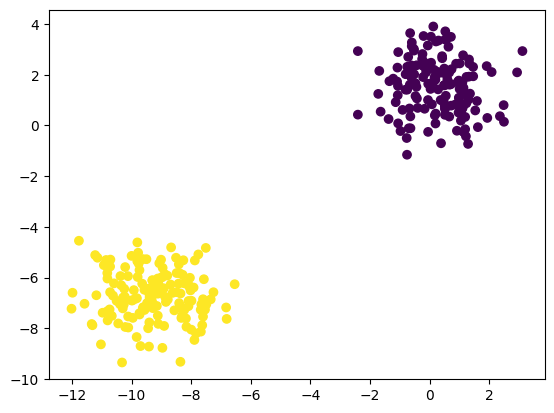

In [14]:
plt.scatter(feat['X1'],feat['X2'],c=y)

In [15]:
from mpl_toolkits.mplot3d import Axes3D

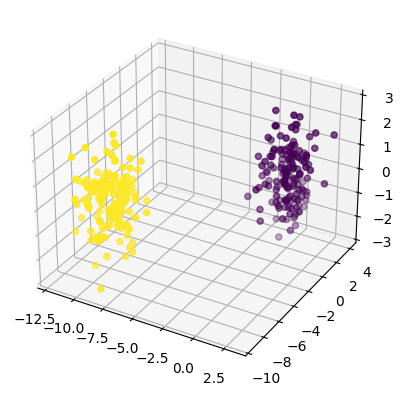

In [16]:
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
ax.scatter(feat['X1'],feat['X2'],feat['X3'],c=y)

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

In [19]:
encoder = Sequential()
encoder.add(Dense(units=2,activation='relu',input_shape=[3]))

In [20]:
decoder = Sequential()
decoder.add(Dense(units=3,activation='relu',input_shape=[2]))

In [21]:
autoencoder = Sequential([encoder,decoder])

In [23]:
autoencoder.compile(loss='mse',optimizer=SGD(learning_rate=1.5))

In [24]:
from sklearn.preprocessing import MinMaxScaler

In [25]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(feat)

In [26]:
autoencoder.fit(scaled_data,scaled_data,epochs=5)

Epoch 1/5
10/10 [==============================] - 1s 2ms/step - loss: 0.2733
Epoch 2/5
10/10 [==============================] - 0s 2ms/step - loss: 0.2066
Epoch 3/5
10/10 [==============================] - 0s 2ms/step - loss: 0.1604
Epoch 4/5
10/10 [==============================] - 0s 2ms/step - loss: 0.1560
Epoch 5/5
10/10 [==============================] - 0s 2ms/step - loss: 0.1101


In [27]:
encoded_2dim = encoder.predict(scaled_data)

10/10 [==============================] - 0s 2ms/step


In [28]:
encoded_2dim

array([[8.55231881e-02, 3.26606810e-01],
       [1.35055900e+00, 1.35415852e-01],
       [1.26384377e+00, 1.84148312e-01],
       [4.01151180e-02, 0.00000000e+00],
       [0.00000000e+00, 4.95000482e-02],
       [0.00000000e+00, 0.00000000e+00],
       [1.21731496e+00, 0.00000000e+00],
       [0.00000000e+00, 3.51817012e-02],
       [1.20347786e+00, 0.00000000e+00],
       [1.27006030e+00, 1.33758128e-01],
       [0.00000000e+00, 6.97512627e-02],
       [0.00000000e+00, 0.00000000e+00],
       [1.33382368e+00, 8.21869373e-02],
       [1.80609822e-02, 0.00000000e+00],
       [1.23602581e+00, 0.00000000e+00],
       [1.39644504e-01, 3.71398330e-02],
       [1.16376925e+00, 7.48916268e-02],
       [1.35218382e+00, 2.86242723e-01],
       [1.21709776e+00, 3.99834931e-01],
       [1.26257038e+00, 3.46780419e-02],
       [0.00000000e+00, 1.22745335e-02],
       [1.32664394e+00, 3.04735243e-01],
       [1.26368213e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00],
       [0.000000

In [29]:
encoded_2dim.shape

(300, 2)

In [30]:
scaled_data.shape

(300, 3)

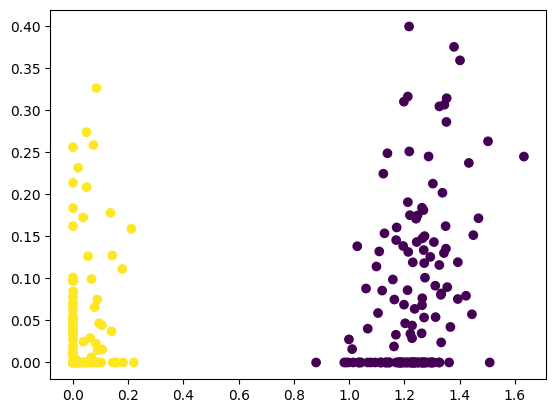

In [32]:
plt.scatter(encoded_2dim[:,0],encoded_2dim[:,1],c=y)